In [1]:
#Importing OpenCV Library for basic image processing functions
import cv2
# Numpy for array related functions
import numpy as np
# Dlib for deep learning based Modules and face landmark detection
import dlib
#face_utils for basic operations of conversion
from imutils import face_utils
from scipy.spatial import distance

C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [16]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[3], mouth[9])  # 51-59
    B = distance.euclidean(mouth[2], mouth[10]) # 50-60
    C = distance.euclidean(mouth[4], mouth[8])  # 52-58
    avg = (A + B + C) / 3
    D = distance.euclidean(mouth[0], mouth[6])  # 48-54

    MAR = avg / D
    return MAR

# Initialize dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)

    for face in faces:
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        MAR = mouth_aspect_ratio(landmarks[48:68])
        SMILE_THRESHOLD = 0.4
        NEUTRAL_THRESHOLD = 0.1

        if MAR > SMILE_THRESHOLD:
            status = "Smiling"
            
        elif MAR < NEUTRAL_THRESHOLD:
            status = "Sad"
        
        else:
            status = "Neutral"

        cv2.putText(frame, status, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [18]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[3], mouth[9])  # 51-59
    B = distance.euclidean(mouth[2], mouth[10]) # 50-60
    C = distance.euclidean(mouth[4], mouth[8])  # 52-58
    avg = (A + B + C) / 3
    D = distance.euclidean(mouth[0], mouth[6])  # 48-54

    MAR = avg / D
    return MAR

# Initialize dlib's face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        landmarks = face_utils.shape_to_np(landmarks)

        # Identify the mouth region (landmarks 48 to 68)
        mouth = landmarks[48:68]

        # Find the bounding box of the mouth
        x_min = min(mouth[:, 0])
        y_min = min(mouth[:, 1])
        x_max = max(mouth[:, 0])
        y_max = max(mouth[:, 1])

        # Draw a rectangle around the mouth
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Calculate MAR and detect emotion
        MAR = mouth_aspect_ratio(mouth)
        SMILE_THRESHOLD = 0.35
        NEUTRAL_THRESHOLD = 0.25
        SAD_THRESHOLD = 0.15

        if MAR > SMILE_THRESHOLD:
            status = "Smiling"
        elif MAR < SAD_THRESHOLD:
            status = "Sad"
        else:
            status = "Neutral"

        # Position for the text
        text_x = x_min
        text_y = y_min - 10 if y_min - 10 > 10 else y_min + 20

        # Put emotion text near the mouth region
        cv2.putText(frame, status, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# ML Model Test #1

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have your data in 'train' and 'val' directories
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    'dataset/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [39]:
# Assuming the MNIST dataset
from tensorflow.keras.datasets import mnist

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))  # assuming we have 7 emotions
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000 // 64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=800 // 64)

Epoch 1/50
 2/31 [>.............................] - ETA: 1s - loss: 1.5159 - accuracy: 0.4141

C:\Users\aoral\AppData\Local\Temp\ipykernel_4916\2789086969.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


31/31 [==============================] - 1s 24ms/step - loss: 1.3704 - accuracy: 0.4597 - val_loss: 1.3735 - val_accuracy: 0.4648
Epoch 2/50
31/31 [==============================] - 1s 22ms/step - loss: 1.3385 - accuracy: 0.4929 - val_loss: 1.3677 - val_accuracy: 0.4648
Epoch 3/50
31/31 [==============================] - 1s 21ms/step - loss: 1.3634 - accuracy: 0.4682 - val_loss: 1.3202 - val_accuracy: 0.4883
Epoch 4/50
31/31 [==============================] - 1s 21ms/step - loss: 1.3430 - accuracy: 0.4934 - val_loss: 1.3083 - val_accuracy: 0.5013
Epoch 5/50
31/31 [==============================] - 1s 20ms/step - loss: 1.3135 - accuracy: 0.4834 - val_loss: 1.3296 - val_accuracy: 0.4870
Epoch 6/50
31/31 [==============================] - 1s 23ms/step - loss: 1.3646 - accuracy: 0.4738 - val_loss: 1.2412 - val_accuracy: 0.5260
Epoch 7/50
31/31 [==============================] - 1s 21ms/step - loss: 1.3558 - accuracy: 0.4955 - val_loss: 1.3287 - val_accuracy: 0.4883
Epoch 8/50
31/31 [======

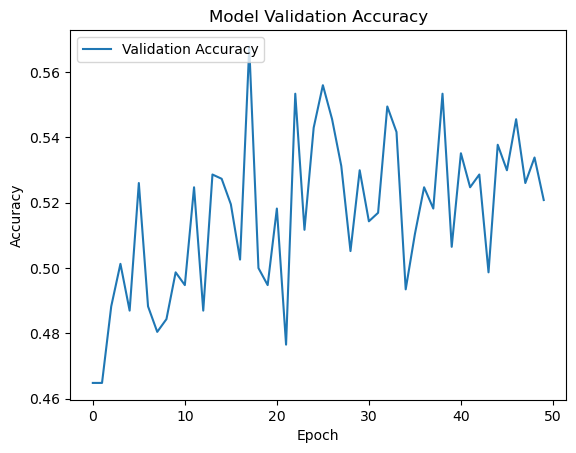

In [35]:
import matplotlib.pyplot as plt

# Assuming you've already trained your model and have the history object
# from the line: history = model.fit(...)

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

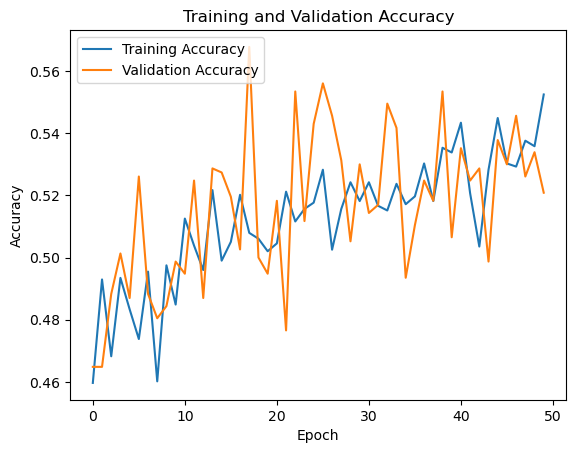

In [36]:
# Plot both training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Test #2

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
import os
import cv2 

from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

from PIL import Image, ImageDraw, ImageFont

from matplotlib import pyplot

In [2]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
valid_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [3]:
INPUT_PATH_TRAIN = 'dataset/train'
INPUT_PATH_TEST = 'dataset/test'

In [4]:
train_dataset=train_datagen.flow_from_directory(directory = INPUT_PATH_TRAIN,
                                               target_size = (48,48),
                                               class_mode = 'categorical',
                                               subset = 'training',
                                               batch_size = 64)

Found 22968 images belonging to 7 classes.


In [5]:
valid_dataset=valid_datagen.flow_from_directory(directory=INPUT_PATH_TEST,
                                               target_size = (48,48),
                                               class_mode = 'categorical',
                                               batch_size = 64)

Found 7178 images belonging to 7 classes.


In [6]:
test_dataset=test_datagen.flow_from_directory(directory = INPUT_PATH_TEST,
                                               target_size = (48,48),
                                               class_mode = 'categorical',
                                               batch_size = 64)

Found 7178 images belonging to 7 classes.


In [7]:
train_datagen = ImageDataGenerator(
    # Other parameters...
    rotation_range=20,  # Example: Add rotation for augmentation
    zoom_range=0.2  # Example: Add zooming for augmentation
)

In [8]:
total_images = 0
for dir_ in os.listdir(INPUT_PATH_TRAIN):
    count = 0
    for f in os.listdir(INPUT_PATH_TRAIN + "/" + dir_ + '/'):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")

print(f"\ntotal images are {total_images}")

angry has 3995 number of images
disgust has 436 number of images
fear has 4097 number of images
happy has 7215 number of images
neutral has 4965 number of images
sad has 4830 number of images
surprise has 3171 number of images

total images are 28709


In [9]:
img_arr = np.empty(shape=(total_images,48,48,3))
img_label = np.empty(shape=(total_images))
label_to_text = {}

i = 0
e = 0
for dir_ in os.listdir(INPUT_PATH_TRAIN):
    label_to_text[e] = dir_
    for f in os.listdir(INPUT_PATH_TRAIN + "/" + dir_ + "/"):
        img_arr[i] = cv2.imread(INPUT_PATH_TRAIN + "/" + dir_ + "/" + f)
        img_label[i] = e
        i += 1
    print(f"loaded all {dir_} images to numpy arrays")
    e += 1

img_arr.shape, img_label

loaded all angry images to numpy arrays
loaded all disgust images to numpy arrays
loaded all fear images to numpy arrays
loaded all happy images to numpy arrays
loaded all neutral images to numpy arrays
loaded all sad images to numpy arrays
loaded all surprise images to numpy arrays


((28709, 48, 48, 3), array([0., 0., 0., ..., 6., 6., 6.]))

In [10]:
label_to_text

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

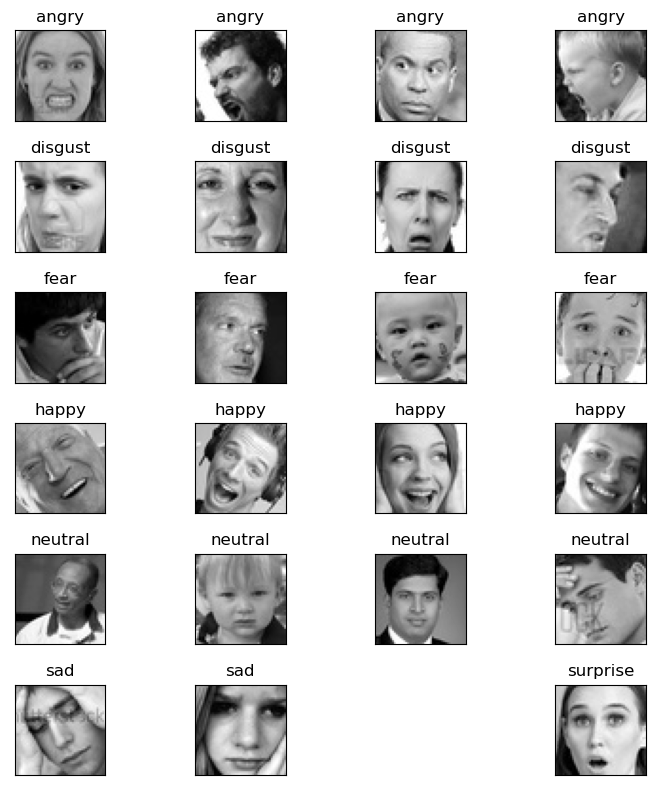

In [11]:
fig = pyplot.figure(1, (8,8))

idx = 0
for k in label_to_text:
    sample_indices = np.random.choice(np.where(img_label==k)[0], size=4, replace=False)
    sample_images = img_arr[sample_indices]
    for img in sample_images:
        if idx < 24:
            idx += 1
        ax = pyplot.subplot(6,4,idx)
        ax.imshow(img[:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[k])
        pyplot.tight_layout()

In [12]:
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras.layers import LeakyReLU  
from tensorflow.keras.regularizers import l2 

inputs = Input((64,64,3))

h = Conv2D(64,(1,1),padding='same',activation='relu')(inputs)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = Conv2D(64,(3,3))(h)
h = BatchNormalization()(h)
#h=MaxPooling2D((2,2),strides=(2,2))(h)
h = Activation('relu')(h)

b = Conv2D(128,(1,1),strides=(2,2))(h)
b = BatchNormalization()(b)

h = SeparableConv2D(128,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = Activation('relu')(h)
h = SeparableConv2D(128,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2),strides=(2,2))(h)

h = concatenate([h,b],name='first')

b = Conv2D(128,(2,2),strides=(2,2))(h)
b = BatchNormalization()(b)

h = SeparableConv2D(128,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(128,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2),strides=(2,2))(h)

h = concatenate([h,b],name='second')

b = Conv2D(256,(1,1),padding='same')(h)
b = BatchNormalization()(b)
b = MaxPooling2D((2,2),strides=(2,2))(b)

h = SeparableConv2D(256,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = Activation('relu')(h)
h = SeparableConv2D(256,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2),strides=(2,2))(h)

h = concatenate([h,b],name='third')
b = h

h = tf.nn.relu(h)
h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)

h = concatenate([h,b],name='fourth')

b = Conv2D(512,(1,1),padding='same')(h)
b = BatchNormalization()(b)
b = MaxPooling2D((2,2),strides=(2,2))(b)

h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2),strides=(2,2))(h)

h = concatenate([h,b],name='fifth')
 
b = Conv2D(1024,(1,1),padding='same')(h)
b = BatchNormalization()(b)
b = MaxPooling2D((2,2),strides=(2,2))(b)
 
h = SeparableConv2D(1024,(3,3),padding='same')(h)
h = tf.nn.relu(h)
h = SeparableConv2D(1024,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = MaxPooling2D((2,2),strides=(2,2))(h)

h = concatenate([h,b],name='sixth')
b = h

h = tf.nn.relu(h)

h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(256,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(128,(3,3),padding='same')(h)
h = BatchNormalization()(h)

h = concatenate([h,b],name='seventh')
b = h

b = Conv2D(256,(1,1),strides = (1,1))(h)
b = BatchNormalization()(b)

h = tf.nn.relu(h)
h = SeparableConv2D(1024,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)
h = SeparableConv2D(512,(3,3),padding='same')(h)
h = BatchNormalization()(h)

h = concatenate([h,b],name='eighth')

h = SeparableConv2D(256,(3,3),padding='same')(h)
h = BatchNormalization()(h)
h = tf.nn.relu(h)



x = GlobalAveragePooling2D()(h)

# Fully Connected Layer
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.4)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.4)(x)

# Additional Fully Connected Layer
x = Dense(256)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.3)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.2)(x)


# Output Layer
outputs = Dense(7, activation='softmax')(x)

In [13]:
# Create the model
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   256         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 tf.nn.relu (TFOpLambda)        (None, 64, 64, 64)   0           ['batch_normalization[0][0]']

                                                                                                  
 batch_normalization_10 (BatchN  (None, 15, 15, 256)  1024       ['separable_conv2d_5[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 15, 15, 256)  1024       ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 7, 7, 256)   0           ['batch_normalization_10[0][0]'] 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 7, 7, 256)   0           ['batch_normalization_8[0][0]']  
          

 max_pooling2d_7 (MaxPooling2D)  (None, 1, 1, 1024)  0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 1, 1, 1024)  0           ['batch_normalization_17[0][0]'] 
                                                                                                  
 sixth (Concatenate)            (None, 1, 1, 2048)   0           ['max_pooling2d_7[0][0]',        
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 tf.nn.relu_9 (TFOpLambda)      (None, 1, 1, 2048)   0           ['sixth[0][0]']                  
                                                                                                  
 separable_conv2d_13 (Separable  (None, 1, 1, 512)   1067520     ['tf.nn.relu_9[0][0]']           
 Conv2D)  

                                                                                                  
 leaky_re_lu_1 (LeakyReLU)      (None, 512)          0           ['batch_normalization_27[0][0]'] 
                                                                                                  
 dropout_1 (Dropout)            (None, 512)          0           ['leaky_re_lu_1[0][0]']          
                                                                                                  
 dense_2 (Dense)                (None, 256)          131328      ['dropout_1[0][0]']              
                                                                                                  
 batch_normalization_28 (BatchN  (None, 256)         1024        ['dense_2[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 leaky_re_

In [14]:
# Correct usage of compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_dataset.labels), y=train_dataset.labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Compile the model with class weights
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=METRICS)

In [15]:
def f1_score(y_true,y_pred):
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    possible_positives=K.sum(K.round(K.clip(y_true,0,1)))
    predicted_positives=K.sum(K.round(K.clip(y_pred,0,1)))
    precision=true_positives/(predicted_positives+K.epsilon())
    recall=true_positives/(possible_positives+K.epsilon())
    f1_val=2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [16]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
      f1_score,
]

In [17]:
lrd=ReduceLROnPlateau(monitor='val_loss',patience=20,verbose=1,factor=0.50,min_lr=0.00005)
mcp=ModelCheckpoint('emotion_predict.h5')
es=EarlyStopping(verbose=1,patience=20)

In [18]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [19]:
model = load_model('emotion_predict.h5', custom_objects={'f1_score': f1_score})

In [20]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs=1,verbose=1,callbacks=[lrd,mcp,es])

359/359 [==============================] - 110s 279ms/step - loss: 0.3857 - accuracy: 0.9616 - precision: 0.8850 - recall: 0.8406 - auc: 0.9860 - f1_score: 0.8621 - val_loss: 1.4266 - val_accuracy: 0.8969 - val_precision: 0.6508 - val_recall: 0.6003 - val_auc: 0.8944 - val_f1_score: 0.6256 - lr: 0.0010


In [21]:
model.save('emotion_predict.h5')

In [22]:
model_acc=model.evaluate(test_dataset,verbose=0)[1]
preds=model.predict(test_dataset)
y_preds=np.argmax(preds,axis=1)
y_test=np.array(test_dataset.labels)

113/113 [==============================] - 4s 33ms/step


In [23]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

class_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

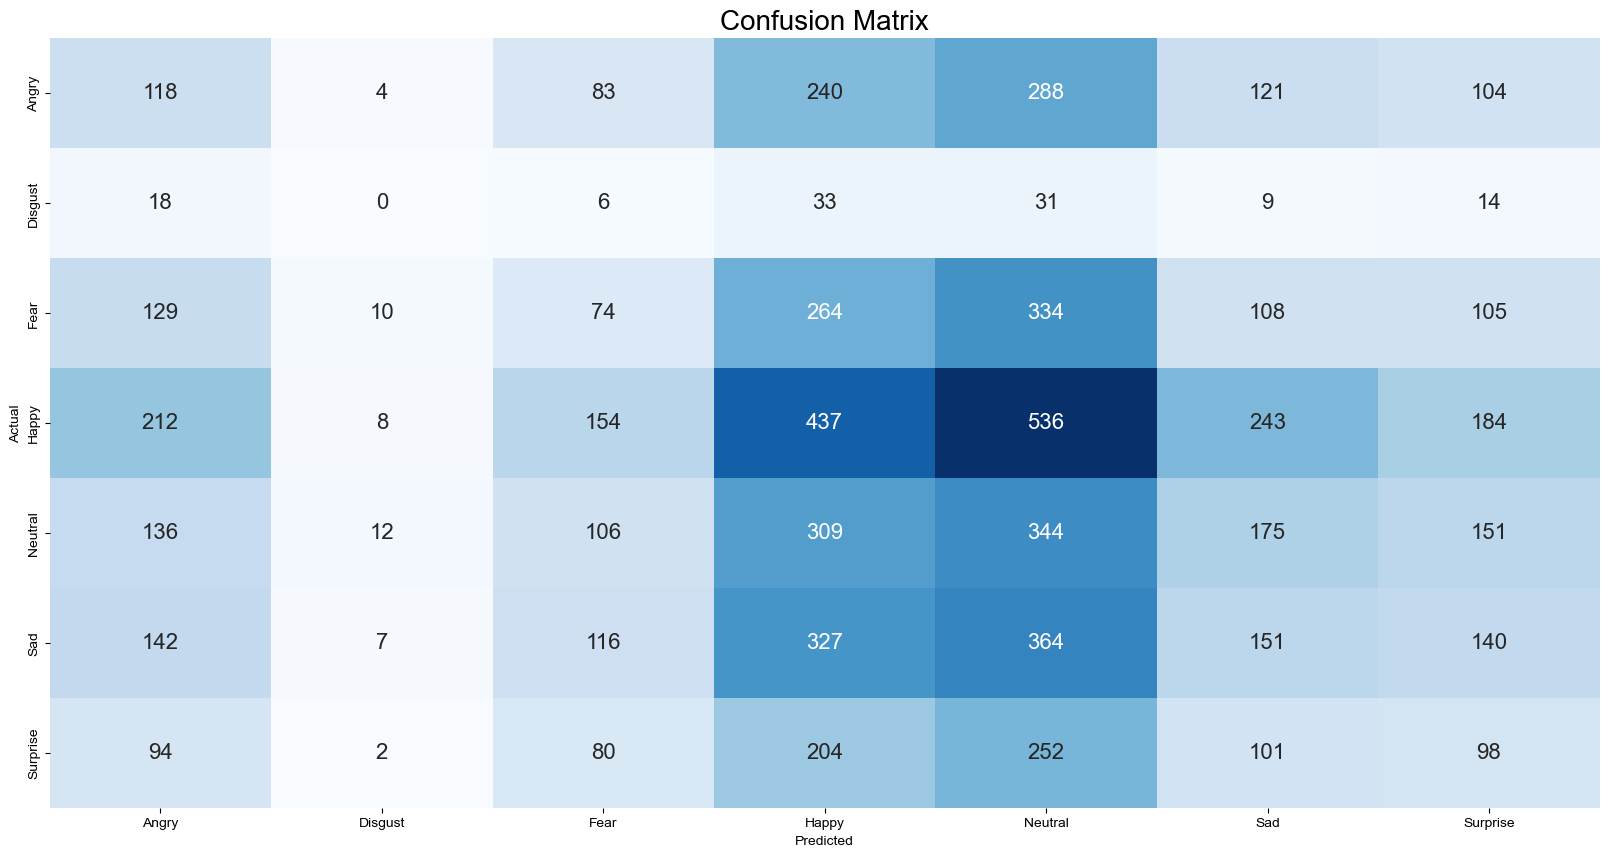

In [24]:
cm_data = confusion_matrix(y_test,y_preds)
cm = pd.DataFrame(cm_data,columns=class_labels,index=class_labels)
cm.index.name = "Actual"
cm.columns.name = "Predicted"


plt.figure(figsize=(20,10))
plt.title('Confusion Matrix',fontsize=20)

sn.set(font_scale=1.2)
sn.set(font_scale=1.2)

ax = sn.heatmap(cm,cbar=False,cmap="Blues",annot=True,annot_kws={"size":16},fmt='g')

ROC AUC score: 0.5500858660132558


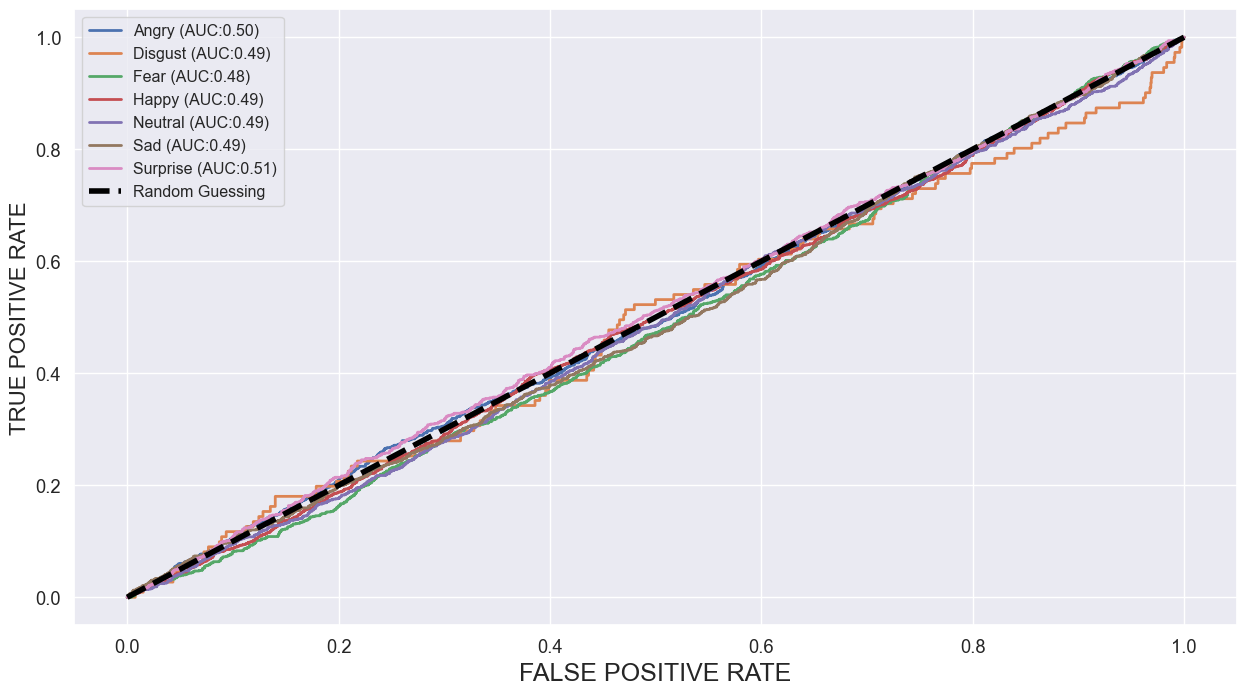

In [25]:
fig,c_ax=plt.subplots(1,1,figsize=(15,8))

def multiclass_roc_auc_score(y_test,y_preds,average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    for(idx,c_label) in enumerate(class_labels):
        fpr,tpr,thresholds=roc_curve(y_test[:,idx].astype(int),y_preds[:,idx])
        c_ax.plot(fpr,tpr,lw=2,label='%s (AUC:%0.2f)'%(c_label,auc(fpr,tpr)))
    c_ax.plot(fpr,fpr,'black',linestyle='dashed',lw=4,label='Random Guessing')
    return roc_auc_score(y_test,y_preds,average=average)

print('ROC AUC score:',multiclass_roc_auc_score(y_test,preds,average='micro'))
plt.xlabel('FALSE POSITIVE RATE',fontsize=18)
plt.ylabel('TRUE POSITIVE RATE',fontsize=16)
plt.legend(fontsize=11.5)
plt.show()

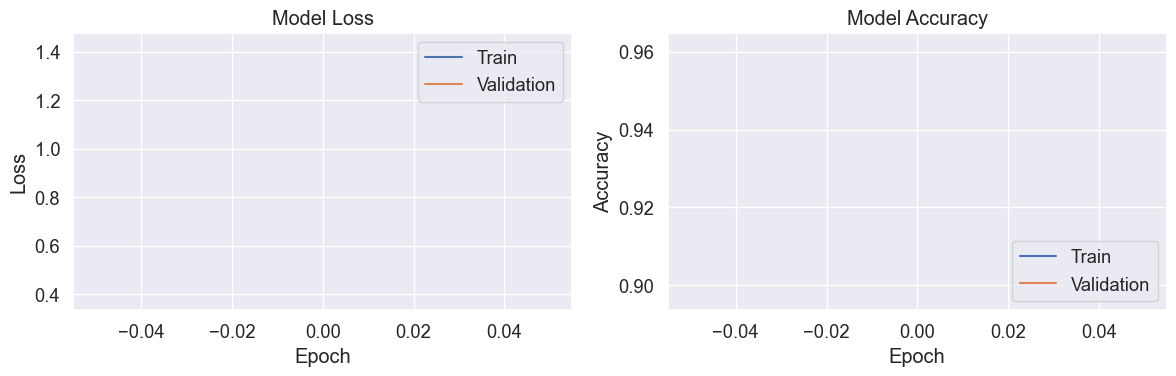

In [27]:
# Assuming you have 'history' object with 'loss', 'val_loss', 'accuracy', and 'val_accuracy' data

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper right')

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='lower right')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

1/1 [==============================] - 0s 18ms/step
Predicted Emotion: Sad


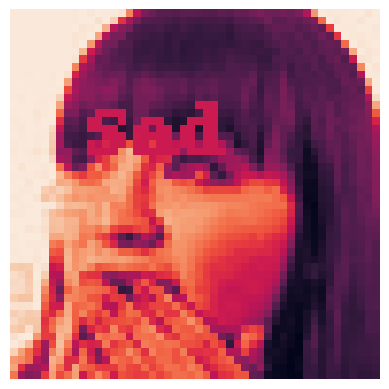

Predicted Emotion: Happy


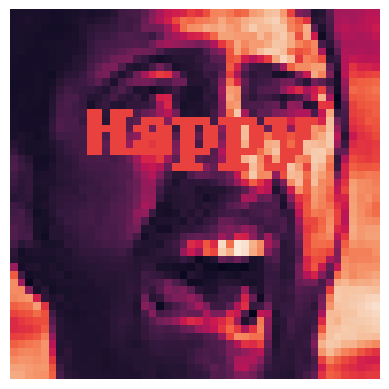

In [45]:
# Load the saved model
#model = load_model('emotion_predict.h5', custom_objects={'f1_score': f1_score})
# Define a function to predict the emotion
def predict_emotion(image_path):
    # Load and preprocess the input image
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the pixel values

    # Make predictions
    predictions = model.predict(img)

    # Map predicted class to emotion label (modify this mapping based on your dataset)
    emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    predicted_emotion = emotion_labels[np.argmax(predictions)]

    return predicted_emotion

# Path to the image you want to test
image_test_one = 'dataset/test/surprise/PrivateTest_104142.jpg'
image_test_two = 'dataset/test/angry/PrivateTest_1488292.jpg'

image_one_test = Image.open(image_test_one)
image_two_test = Image.open(image_test_two)

# Get the predicted emotion
predicted_emotion_one = predict_emotion(image_test_one)
predicted_emotion_two = predict_emotion(image_test_two)

predicted_emotion = predicted_emotion_one
predicted_emotion_test_two = predicted_emotion_two

# Draw the text on the image
draw = ImageDraw.Draw(image_one_test)
font = ImageFont.load_default()
text_position = (10, 10)  # Position where the text will be drawn
draw.text(text_position, predicted_emotion, 128)

print("Predicted Emotion:", predicted_emotion_one)
# Display the image
plt.imshow(image_one_test)
plt.axis('off')  # Turn off the axis
plt.show()

print("Predicted Emotion:", predicted_emotion_two)
# Draw the text on the image
draw = ImageDraw.Draw(image_two_test)
font = ImageFont.load_default()
text_position = (10, 10)  # Position where the text will be drawn
draw.text(text_position, predicted_emotion_test_two, 128)

# Display the image
plt.imshow(image_two_test)
plt.axis('off')  # Turn off the axis
plt.show()

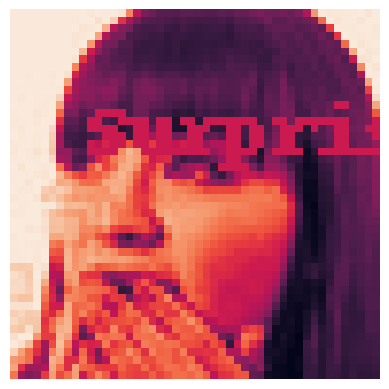

In [40]:
# Load the generated image
image_path = 'dataset/test/surprise/PrivateTest_104142.jpg'
image = Image.open(image_path)

# Placeholder for the predicted emotion
predicted_emotion = "Surprised"  # This would be replaced by the output of your ML model

# Draw the text on the image
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
text_position = (10, 10)  # Position where the text will be drawn
draw.text(text_position, predicted_emotion, 128)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()


In [34]:
from sklearn.metrics import confusion_matrix

# Your code for creating the confusion matrix
cm_data = confusion_matrix(y_test, y_preds)

# Calculate confusion matrix accuracy (True Positive Rate) for each class
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
accuracies = {}

for i, label in enumerate(class_labels):
    TP = cm_data[i, i]  # True Positives for the current class
    FN = np.sum(cm_data[i, :]) - TP  # False Negatives for the current class
    accuracy = TP / (TP + FN)  # Confusion matrix accuracy (True Positive Rate)
    accuracies[label] = accuracy

# Print the confusion matrix accuracy for each class
for label, accuracy in accuracies.items():
    print(f'Accuracy for class {label}: {accuracy:.2f}')

Accuracy for class Angry: 0.12
Accuracy for class Disgust: 0.00
Accuracy for class Fear: 0.07
Accuracy for class Happy: 0.25
Accuracy for class Neutral: 0.28
Accuracy for class Sad: 0.12
Accuracy for class Surprise: 0.12


# Test #3

In [1]:
import os
import math
import numpy as np
import cv2
import scikitplot

import seaborn as sns
import tensorflow as tf
import pandas as pd

from keras.utils import to_categorical
from matplotlib import pyplot

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
INPUT_PATH = 'dataset/train'

In [3]:
total_images = 0
for dir_ in os.listdir(INPUT_PATH):
    count = 0
    for f in os.listdir(INPUT_PATH + "/" + dir_ + '/'):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")

print(f"\ntotal images are {total_images}")

angry has 3995 number of images
disgust has 436 number of images
fear has 4097 number of images
happy has 7215 number of images
neutral has 4965 number of images
sad has 4830 number of images
surprise has 3171 number of images

total images are 28709


In [4]:
img_arr = np.empty(shape=(total_images,48,48,3))
img_label = np.empty(shape=(total_images))
label_to_text = {}

i = 0
e = 0
for dir_ in os.listdir(INPUT_PATH):
    label_to_text[e] = dir_
    for f in os.listdir(INPUT_PATH + "/" + dir_ + "/"):
        img_arr[i] = cv2.imread(INPUT_PATH + "/" + dir_ + "/" + f)
        img_label[i] = e
        i += 1
    print(f"loaded all {dir_} images to numpy arrays")
    e += 1

img_arr.shape, img_label

loaded all angry images to numpy arrays
loaded all disgust images to numpy arrays
loaded all fear images to numpy arrays
loaded all happy images to numpy arrays
loaded all neutral images to numpy arrays
loaded all sad images to numpy arrays
loaded all surprise images to numpy arrays


((28709, 48, 48, 3), array([0., 0., 0., ..., 6., 6., 6.]))

In [5]:
label_to_text

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

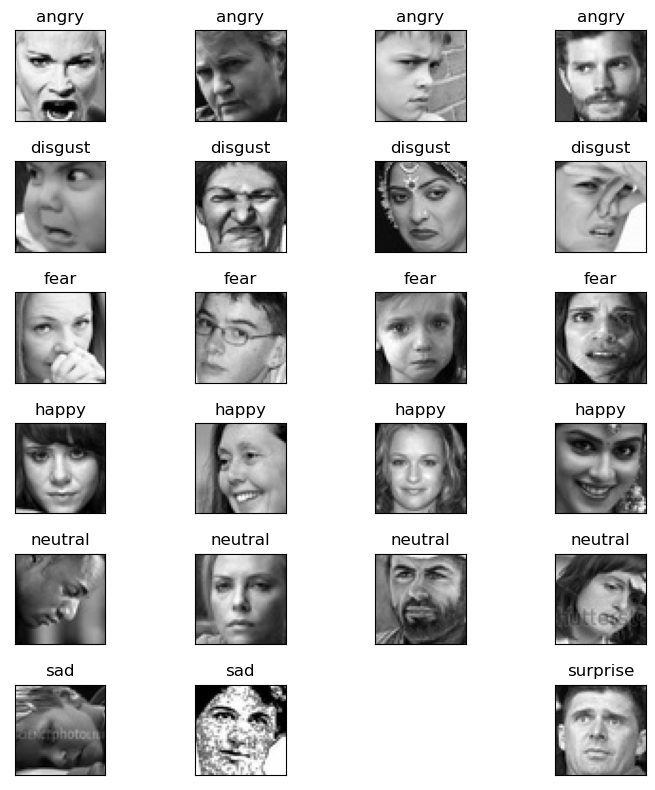

In [6]:
fig = pyplot.figure(1, (8,8))

idx = 0
for k in label_to_text:
    sample_indices = np.random.choice(np.where(img_label==k)[0], size=4, replace=False)
    sample_images = img_arr[sample_indices]
    for img in sample_images:
        if idx < 24:
            idx += 1
        ax = pyplot.subplot(6,4,idx)
        ax.imshow(img[:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[k])
        pyplot.tight_layout()

In [7]:
img_label = to_categorical(img_label)
img_label.shape

(28709, 7)

In [8]:
img_arr = img_arr / 255.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(img_arr, img_label,
                                                    shuffle=True, stratify=img_label,
                                                    train_size=0.9, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25838, 48, 48, 3), (2871, 48, 48, 3), (25838, 7), (2871, 7))

In [10]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [11]:
mobile_net = MobileNet(
    input_shape = (img_width, img_height, img_depth),
    include_top = False,
    weights = "imagenet",
    classes = num_classes
)

x = mobile_net.layers[-14].output
global_pool = GlobalMaxPool2D(name="global_pool")(x)
out = Dense(num_classes, activation="softmax", name="out_layer")(global_pool)

model = Model(inputs=mobile_net.input, outputs=out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                      

                                                                 
 conv_pw_8 (Conv2D)          (None, 3, 3, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 3, 3, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 3, 3, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 3, 3, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 3, 3, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 3, 3, 512)         0         
                                                                 
 conv_pw_9

In [12]:
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50, to_file='mobilenet.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
for layer in model.layers[:15]:
    layer.trainable = False

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    zca_whitening=False,
)
train_datagen.fit(X_train)

In [14]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00008,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    min_delta=0.0001,
    factor=0.25,
    patience=4,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [15]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
#history=model.fit(train_dataset,validation_data=valid_dataset,epochs=3,verbose=1,callbacks=[lrd,mcp,es])

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=16),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) / 16,
    epochs=10,
    callbacks=callbacks,
    workers = 1,
    use_multiprocessing=False
)

Epoch 1/10
1614/1614 [==============================] - 18s 11ms/step - loss: 0.8009 - accuracy: 0.6992 - val_loss: 1.0100 - val_accuracy: 0.6374 - lr: 3.9063e-06
Epoch 2/10
1614/1614 [==============================] - 19s 12ms/step - loss: 0.8022 - accuracy: 0.6984 - val_loss: 1.0109 - val_accuracy: 0.6378 - lr: 3.9063e-06
Epoch 3/10
1614/1614 [==============================] - 23s 14ms/step - loss: 0.8033 - accuracy: 0.7008 - val_loss: 1.0123 - val_accuracy: 0.6381 - lr: 3.9063e-06
Epoch 4/10
1614/1614 [==============================] - 23s 14ms/step - loss: 0.8044 - accuracy: 0.6961 - val_loss: 1.0132 - val_accuracy: 0.6353 - lr: 3.9063e-06
Epoch 5/10
1614/1614 [==============================] - 24s 15ms/step - loss: 0.8070 - accuracy: 0.6970 - val_loss: 1.0103 - val_accuracy: 0.6378 - lr: 3.9063e-06
Epoch 6/10
1614/1614 [==============================] - 21s 13ms/step - loss: 0.7984 - accuracy: 0.7006 - val_loss: 1.0148 - val_accuracy: 0.6388 - lr: 3.9063e-06
Epoch 7/10
1614/1614 [

In [19]:
model.save("emotion_detector_test_three.h5")

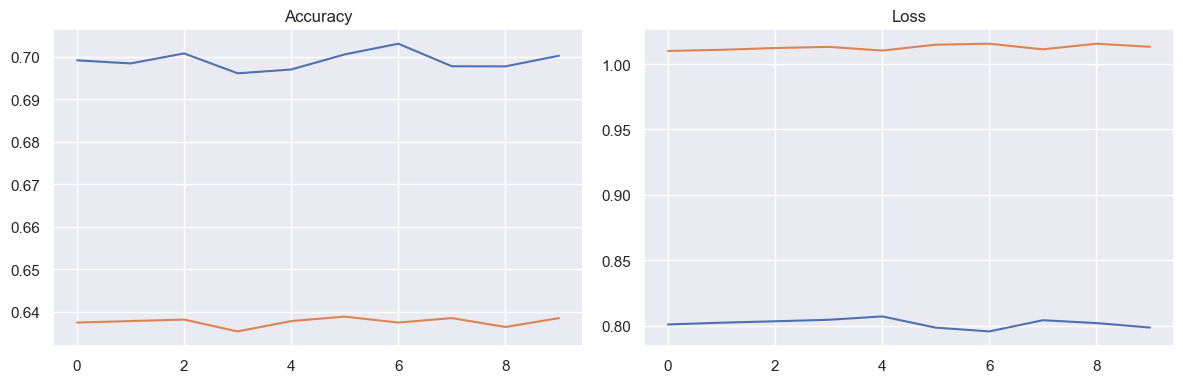

In [20]:
sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_mobilenet.png')
pyplot.show()

In [21]:
label_to_text

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [22]:
text_to_label = dict((v,k) for k,v in label_to_text.items())
text_to_label

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

90/90 [==============================] - 1s 8ms/step
test accuracy: 63.8454 %




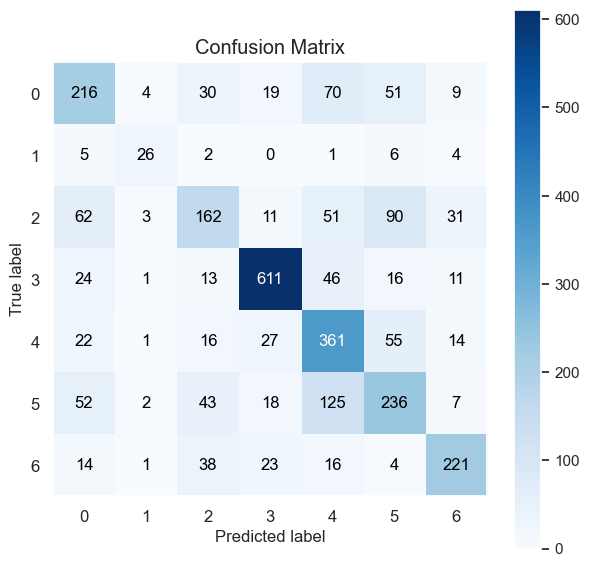

In [23]:
yhat_test = np.argmax(model.predict(X_test), axis=1)
ytest_ = np.argmax(y_test, axis=1)

scikitplot.metrics.plot_confusion_matrix(ytest_, yhat_test, figsize=(7,7))
pyplot.savefig("confusion_matrix_mobilenet.png")

test_accu = np.sum(ytest_ == yhat_test) / len(ytest_) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

In [25]:
print(classification_report(ytest_, yhat_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54       399
           1       0.68      0.59      0.63        44
           2       0.53      0.40      0.45       410
           3       0.86      0.85      0.85       722
           4       0.54      0.73      0.62       496
           5       0.52      0.49      0.50       483
           6       0.74      0.70      0.72       317

    accuracy                           0.64      2871
   macro avg       0.63      0.61      0.62      2871
weighted avg       0.64      0.64      0.64      2871



1/1 [==============================] - 0s 13ms/step


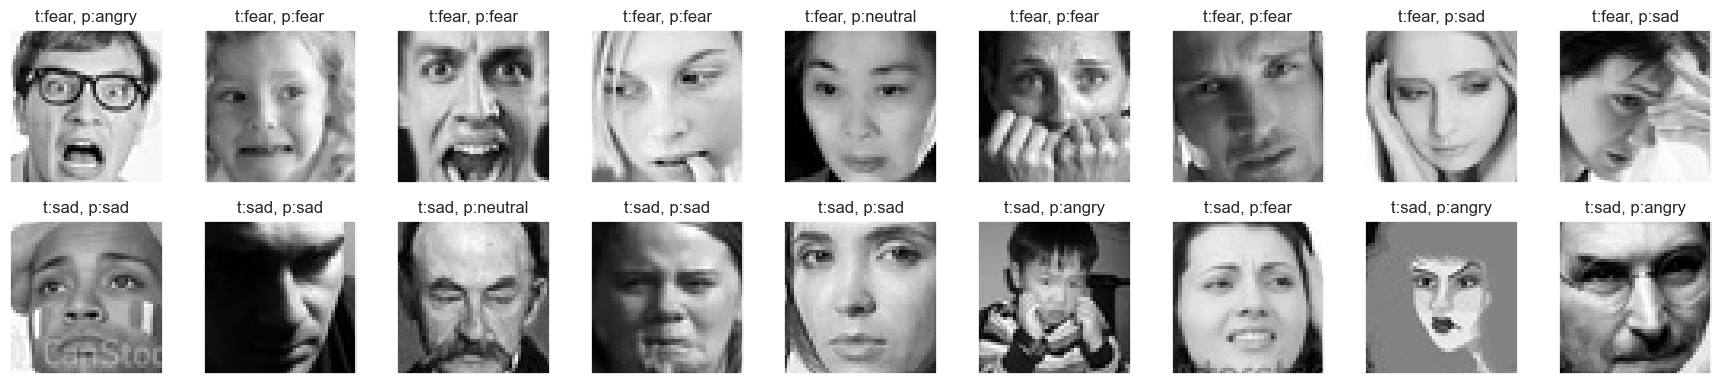

In [26]:
np.random.seed(42)
fear_imgs = np.random.choice(np.where(y_test[:, text_to_label["fear"]]==1)[0], size=9, replace=False)
sad_imgs = np.random.choice(np.where(y_test[:, text_to_label["sad"]]==1)[0], size=9, replace=False)

fig = pyplot.figure(1, (18, 4))

for i, (fear_idx, sad_idx) in enumerate(zip(fear_imgs, sad_imgs)):
        sample_img = X_test[fear_idx,:,:,:]
        sample_img = sample_img.reshape(1,*sample_img.shape)
        pred = label_to_text[np.argmax(model.predict(sample_img), axis=1)[0]]

        ax = pyplot.subplot(2, 9, i+1)
        ax.imshow(sample_img[0,:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"t:fear, p:{pred}")

        sample_img = X_test[sad_idx,:,:,:]
        sample_img = sample_img.reshape(1,*sample_img.shape)
        pred = label_to_text[np.argmax(model.predict(sample_img), axis=1)[0]]

        ax = pyplot.subplot(2, 9, i+10)
        ax.imshow(sample_img[0,:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"t:sad, p:{pred}")

        pyplot.tight_layout()

In [27]:
def plot_miss_classified(emotion):
    miss_happy_indices = np.where((ytest_ != yhat_test) & (ytest_==text_to_label[emotion]))[0]
    print(f"total {len(miss_happy_indices)} miss labels out of {len(np.where(ytest_==text_to_label[emotion])[0])} for emotion {emotion}")

    cols = 15
    rows = math.ceil(len(miss_happy_indices) / cols)
    fig = pyplot.figure(1, (20, rows * 2))

    for i,idx in enumerate(miss_happy_indices):
        sample_img = X_test[idx,:,:,:]
        sample_img = sample_img.reshape(1,*sample_img.shape)
        pred = label_to_text[np.argmax(model.predict(sample_img), axis=1)[0]]

        ax = pyplot.subplot(rows,cols,i+1)
        ax.imshow(sample_img[0,:,:,0], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"p:{pred}")    

total 111 miss labels out of 722 for emotion happy
1/1 [==============================] - 0s 14ms/step


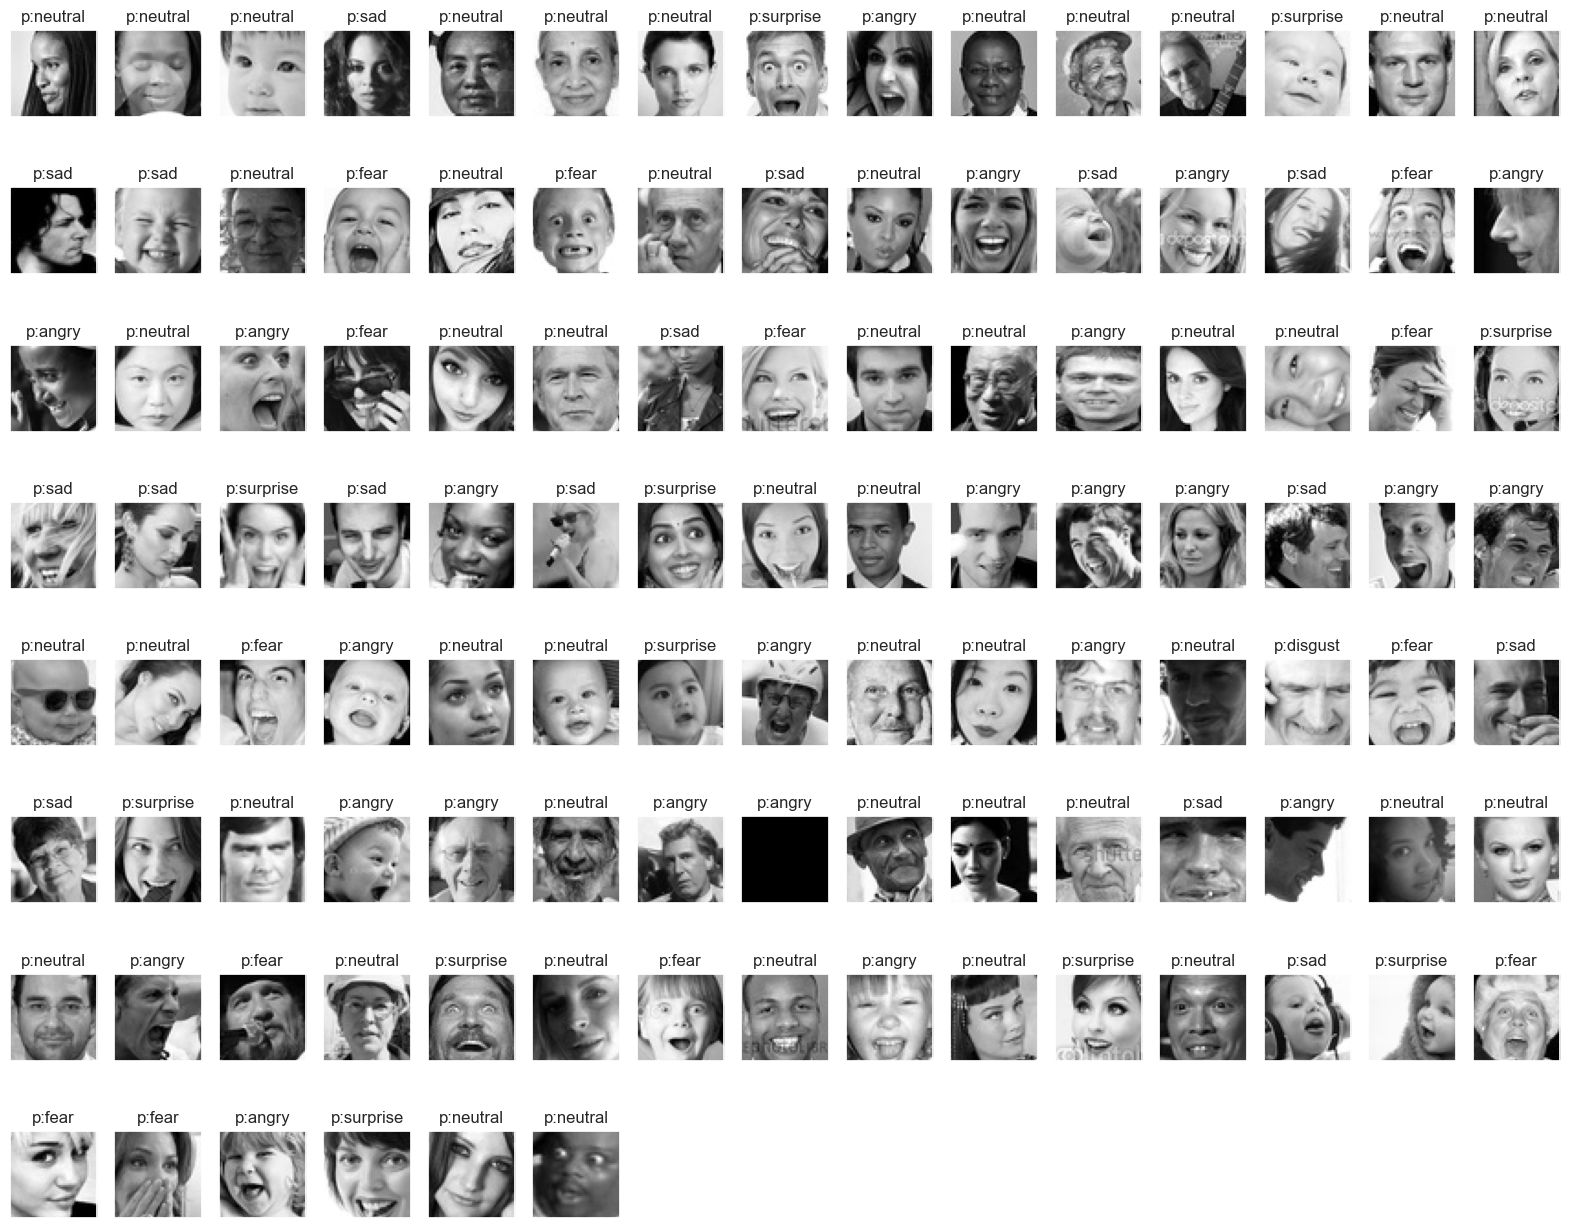

In [28]:
plot_miss_classified(emotion="happy")

total 135 miss labels out of 496 for emotion neutral
1/1 [==============================] - 0s 21ms/step


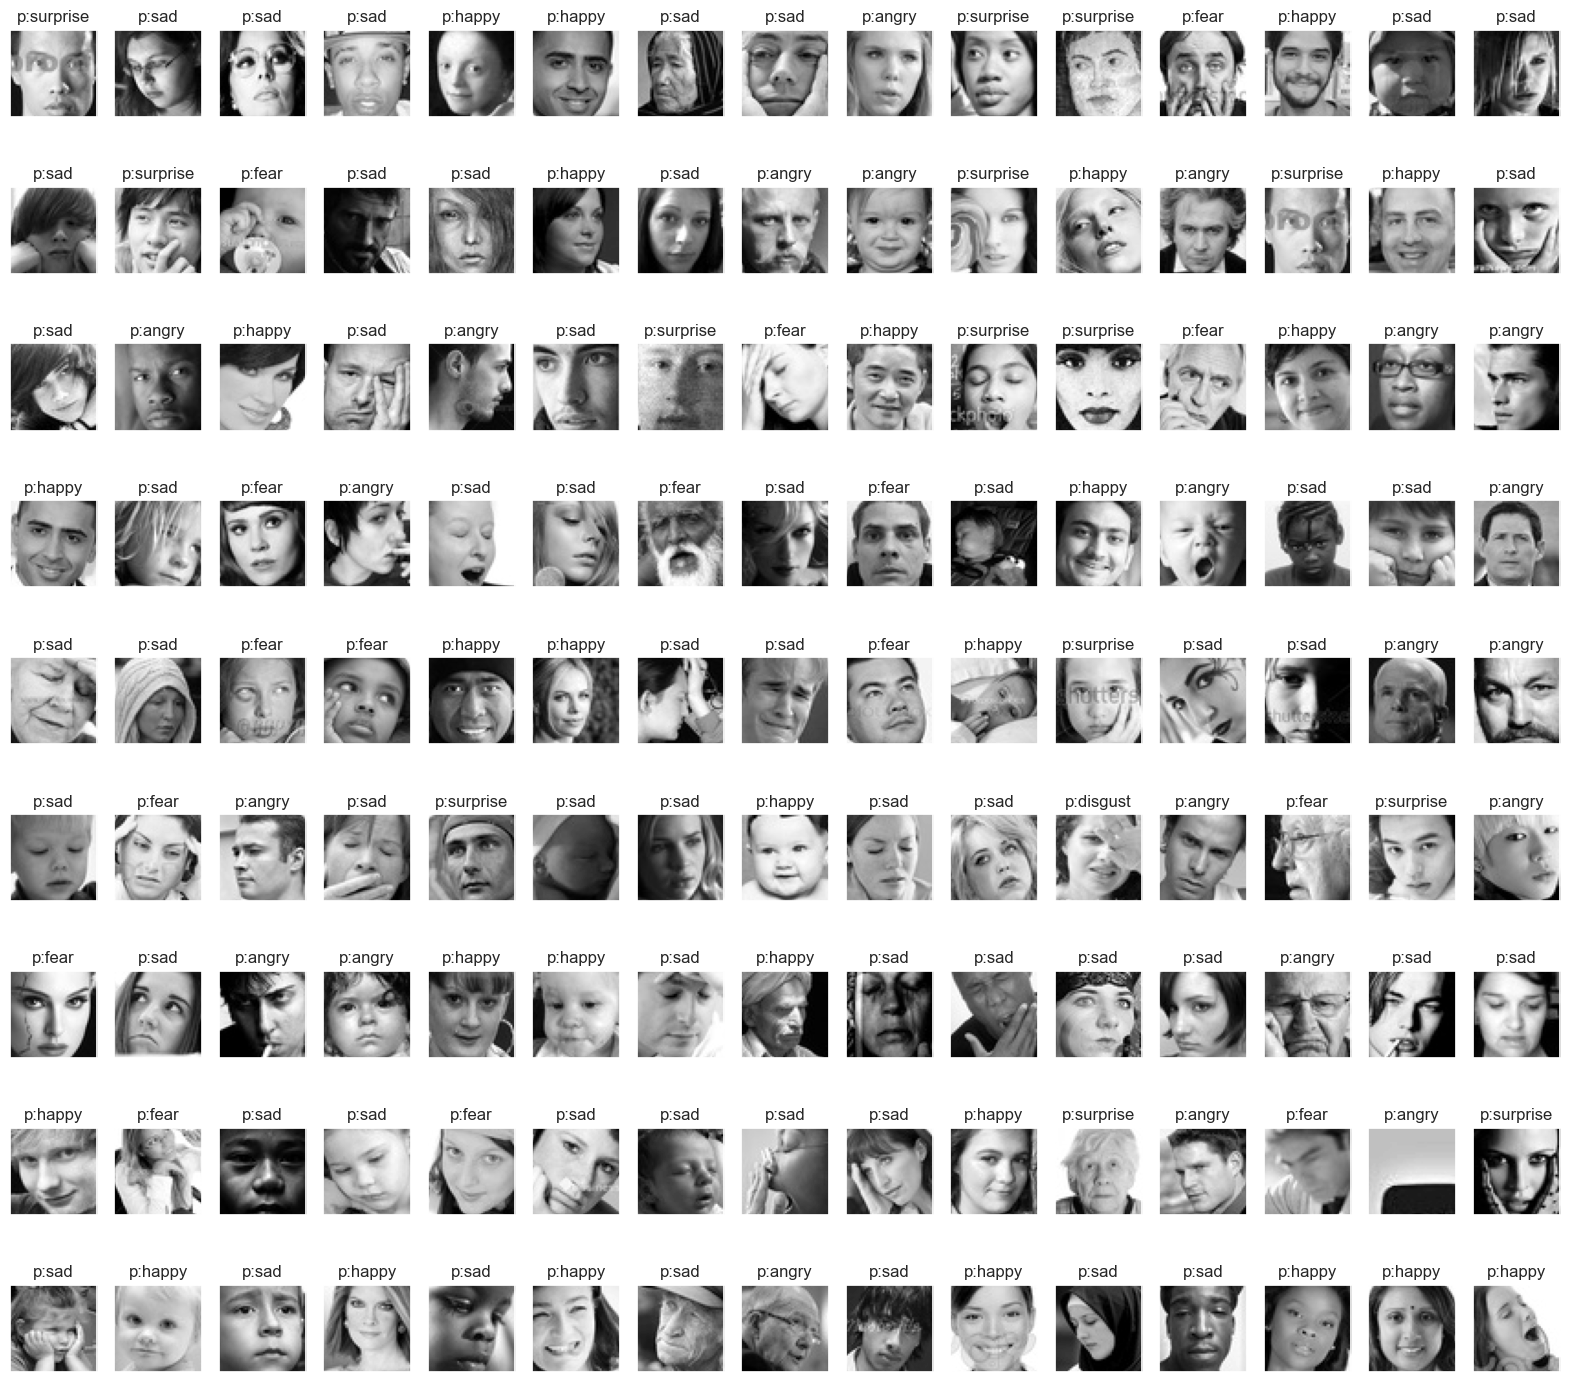

In [29]:
plot_miss_classified(emotion="neutral")